## Final Project Submission


## Final Project Submission

Please fill out:
* Student name:
 
                Joan Njoroge

                Eunice Nduati

                Rodgers Bob
                
                Maryan Hajir
                
* Student pace:  **part time** 
* Scheduled project review date/time: 
* Instructor name: **Maryann Mwikali**
* Blog post URL:

## BUSINESS PROBLEM

### Seasonal Sales Analysis 

     Explore the impact of seasons on property sales within the real estate market and quantify these effects. Understanding seasonal variations is crucial in understanding how they affect the industry.

### Property Price Prediction

    Evaluate how property characteristics have an affect on their prices. This can aid in accurately predicting property prices.

## DATA CLEANING

In [133]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [134]:
# Load CSV into a DataFrame
df = pd.read_csv('data/kc_house_data.csv')

# Show the info of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [135]:
# checking a random sample of 5 rows from the DataFrame
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.0,4,1.75,2410,8447,2.0,NO,GOOD,...,8 Good,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
13428,2722059275,5/12/2015,536000.0,3,2.75,2290,34548,2.0,NO,GOOD,...,7 Average,2290,0.0,1984,0.0,98042,47.3691,-122.163,399,275299
6174,1266200130,6/15/2014,650000.0,3,1.75,2140,9484,1.0,NaN,NONE,...,7 Average,1290,850.0,1953,0.0,98004,47.6234,-122.191,1960,9630
14288,7303100210,5/27/2014,355000.0,4,2.25,1810,4970,2.0,NO,NONE,...,7 Average,1810,0.0,2003,NaN,98059,47.5003,-122.156,1810,4858
12794,9547204675,10/24/2014,538000.0,2,1.75,1850,3060,1.0,NO,NONE,...,7 Average,1060,790.0,1929,1992.0,98115,47.6821,-122.308,1850,4080


In [136]:
# Removing non numeric variables from grade column
df['grade'] = df['grade'].str.replace(r'\D', '', regex=True)
# convert into an integer
df['grade'] = df['grade'].astype(int)

### Checking if there are missing values in the dataframe

In [137]:
# Counting the number of missing values in each column

missing_values_count = df.isnull().sum().sort_values(ascending=False)
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


### Handling missing values

In [182]:
#Replace NaN in view to NONE

df['view'] = df['view'].fillna('NONE')

# replace NaN in waterfront to NO
df['waterfront'] = df['waterfront'].fillna('NO')

# replace NaN in yr_renovated to 0
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Display the modified DataFrame to check for indicator columns
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,month,month_sold,season,year,age,renovated
6065,6911700066,2014-06-04,175000.0,2.0,1.00,670,2378,1.0,0,0,...,47.5769,-122.372,700,2970,6,6,2.0,2014,95,0
13402,1432701510,2014-10-21,249000.0,4.0,2.00,1280,7560,1.0,0,0,...,47.4500,-122.175,1250,7690,10,10,NaN,2014,55,0
10933,6450304260,2014-07-22,294000.0,2.0,1.00,850,5250,1.0,0,0,...,47.7310,-122.342,1440,5250,7,7,2.0,2014,64,0
2633,6791400320,2014-09-23,257500.0,3.0,1.75,1530,14087,1.0,0,0,...,47.3146,-122.043,1770,13660,9,9,NaN,2014,35,0
3646,7523900300,2015-04-07,370000.0,4.0,2.75,2310,14745,1.0,0,0,...,47.3770,-122.310,2060,9678,4,4,1.0,2015,22,0


In [139]:
# Changing waterfron values to numerics
waterfront_mapping = {
    'NO': 0,
    'YES': 1
}

df['waterfront'] = df['waterfront'].map(waterfront_mapping)

In [140]:
# Changing condition values to numerics
df['condition'] = df['condition'].str.replace(' ', '_')
condition_mapping = {
    'Average': 2,
    'Very_Good': 4,
    'Good': 3,
    'Poor': 1,
    'Fair': 0
}

df['condition'] = df['condition'].map(condition_mapping)

In [141]:
# changing 'view' values to numerics
view_mapping = {
    'NONE': 0,
    'GOOD': 1,
    'EXCELLENT': 2,
    'AVERAGE': 3,
    'FAIR': 4
}

df['view'] = df['view'].map(view_mapping)

In [142]:
# Checking for presence of duplicate rows

duplicate_rows = df.duplicated().any().sum()
print(duplicate_rows)

0


### Changing the sqft_basement column to datatype 'float'

In [143]:
# Changing the sqft_basement column to datatype 'float'

# Replace '?' with np.NaN
df['sqft_basement'].replace('?', np.NaN, inplace=True)

# Fill null values and convert to float
df['sqft_basement'] = df['sqft_basement'].fillna(0).astype(float)

# Check whether the datatype is now a float
df['sqft_basement'].dtype

dtype('float64')

## EXPLORATORY DATA ANALYSIS

In [144]:
# Checking statistical details for numerical columns.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.246932,2.403297,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.815213,0.669407,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,2.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,2.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,3.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### checking for outliers

In [145]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [146]:
 #if any entry has over 20 bedrooms, replace it with the median.
df.loc[df.bedrooms > 20, 'bedrooms'] = df.bedrooms.median()

## CREATING FEATURES


### FEATURE 1 ; Seasons

In [147]:
# extract months from the date column
df= df.copy()
df['date'] = pd.to_datetime(df['date'])


df['month'] = df['date'].dt.month

# assign numerals to month names
month_name = {1: 'January',2: 'February', 3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',9:

'September',10: 'October',11: 'November',12: 'December'}

# Extract the month and create a new column 'month_sold'
df['month_sold'] = df['month'].map(month_name)

In [148]:
# define seasons
seasons = { 'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Autumn': ['September', 'October', 'November'],
    'Winter': ['December', 'January', 'February']}

#write a function to assign months to seasons.

def assigned_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

# create a seasons column
df['season'] = df['month_sold'].apply(assigned_season)


In [149]:
# find avg , sum and median for sales.

seasonal_data = df.groupby('season').agg({
    'price': ['sum' , 'mean', 'median']
}).reset_index()
seasonal_data = seasonal_data.sort_values(by=('price', 'sum'), ascending=False)
seasonal_data

season         price                         
                    sum           mean    median
1  Spring  3.603038e+09  552782.763271  465000.0
2  Summer  3.459641e+09  546719.464286  455000.0
0  Autumn  2.686134e+09  531276.474881  443725.0
3  Winter  1.919972e+09  519613.645467  430000.0

### BUSINESS PROBLEM 1 INSIGHTS.

**Sum of Price**:  total sum of property prices for each season.

**Mean Price** :  average (mean) of property price for each season.

**Median Price**:  represents the middle value when all property prices are sorted in ascending order.

**Spring**: Total property sales in the spring season were approximately $3.60 billion. The average home price was around 552,782.76, with a median price of 465,000. While there were higher-priced properties, the average property had a median price of 465,000.0 during the spring season.

**Summer**: Total property sales in the summer season were approximately $3.46 billion. The average property price was approximately 546,719.46, with a median price of 455,000.0. This indicates that, on average, properties were slightly less expensive than during the spring season.

**Autumn**: Total property sales in the autumn season were approximately 2.69 billion. The median price was 443,725, and the mean price was approximately 531,276.47. This implies that property prices were relatively high  during the autumn season.

**Winter**: Total property sales in the winter season were approximately 1.92 billion. The median price was 430,000, and the mean price was around 519,613.65. This means that property prices were lower during the winter season compared to the other seasons.


These results provide insights into how property sales and prices vary across the seasons. For example, it appears that properties tend to be more expensive during the spring and summer seasons. This seasons also have the highest number of sales. 

The prices and sales are somewhat lower during the autum and winter seasons.

The stake holders  might consider adjusting their marketing and pricing strategies based on these seasonal patterns. For instance, running marketing campaigns during Spring and Summer so as to take advantage of the high property prices and sales. 

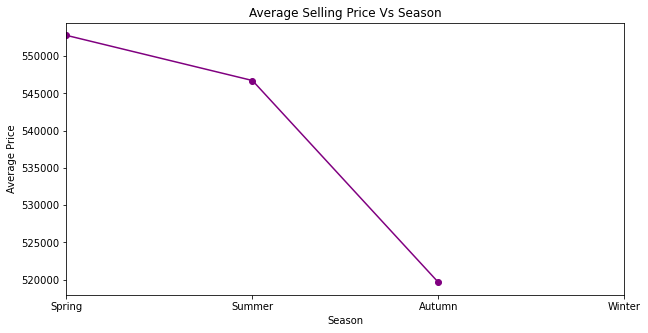

In [150]:
# Graphical representation of average sales per season.

#find average sales per season
avg_price = df.groupby('season')['price'].mean()

#set figure size
plt.figure(figsize=(10, 5))

#plot figure
plt.plot(avg_price.index, avg_price.values, color='purple', marker='o')

# Set labels and title 
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.title('Average Selling Price Vs Season')

# Set x-axis limits, ticks, and labels
plt.xlim(1, 4)
plt.xticks((1, 2, 3, 4), ['Spring', 'Summer', 'Autumn', 'Winter'])

# Display the plot
plt.show()

## BUSINESS PROBLEM 2.

    Analyse how property features affect property prices. The ideal features discovered through the feature selection analysis will be used in making price predictions

### FEATURE 2 ; Age

In [151]:
# Creating variable called age
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Extract the year and create a new 'year' column
df['year'] = df['date'].dt.year


In [152]:
# Calculate property age by subracting the year the property was built from the year the property was sold
df['age'] = df['year'] - df['yr_built']

### FEATURE 3 ; RENOVATION
    

In [153]:
# Creating a dummy variable called year_renovated
df['renovated'] = df['yr_renovated'].apply(lambda x:  1 if x > 0 else 0)

## MODELLING

In [154]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

In [155]:
# Change months to numerics
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['month_sold'] = df['month_sold'].map(month_mapping)

In [156]:
# Change seasons to numerics
season_mapping = {
    'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4
}

df['season'] = df['season'].map(season_mapping)

### FEATURE SELECTION

In this real estate data set, feature selection aids in simplifying the model, making it easier to interpret and reduce the risk of overfitting by eliminating irrelevant or redundant features. In this real estate context, where various features like the number of bedrooms, bathrooms, square footage, and location can influence house prices, not all variables may have a significant impact on the target outcome. Some features may be highly correlated with each other, leading to multicollinearity, which can distort the model's performance and interpretation. Feature selection can enhance the model's generalization capability and improve its performance metrics, thereby providing more reliable and actionable insights. Given the high-stakes nature of real-estate investment and decision-making, an accurate and streamlined predictive model achieved through meticulous feature selection is vital. 

In [157]:
# Defining the features and the target variable
X = df.drop(['price', 'date'], axis=1)
y = df['price']

# Splitting the data into training and test sets so as to evaluate the model's performance later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# using correlation tests to measure how strongly each feature and price are related
# Exclude non-numeric features like 'date' and 'id'
filtered_df = df.select_dtypes(include=[np.number]).drop(columns=['id'])

# Calculate the correlation matrix for the filtered DataFrame
correlation_matrix = filtered_df.corr()

# Isolate the 'price' column to find its correlation with other numeric features
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

print("Correlation of Numerical Features (excluding 'date' and 'id') with Price:")
print(correlation_with_price)

Correlation of Numerical Features (excluding 'date' and 'id') with Price:
price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
sqft_basement    0.321108
bedrooms         0.315954
lat              0.306692
view             0.290620
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
renovated        0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.040742
long             0.022036
year             0.003727
month           -0.009928
month_sold      -0.009928
season          -0.034688
zipcode         -0.053402
age             -0.053890
Name: price, dtype: float64


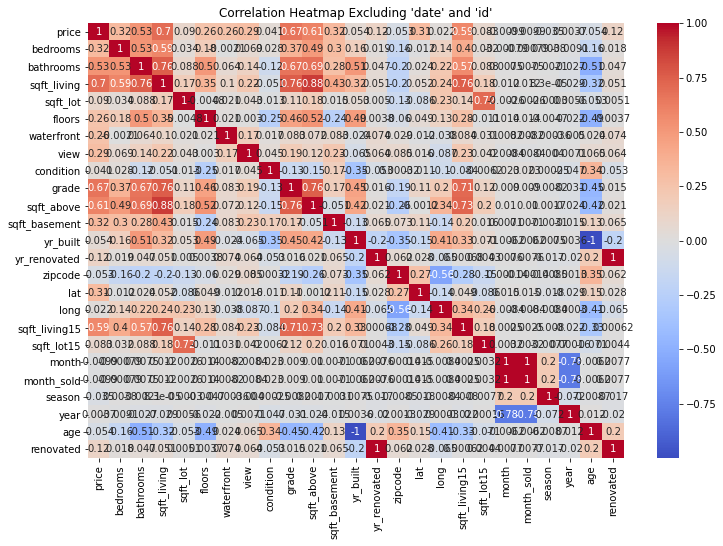

In [159]:
# Visualize the correlations using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Excluding 'date' and 'id'")
plt.show()

#### CREATING A BASELINE MODEL
    A baseline model acts as a starting point for evaluating  models, providing a basic reference point against which complex models are compared.


In [160]:
# fitting the baseline model to the training set and generating a score (r-squared)

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

# we get an r-squared of 0, because we're predictng using NO features

0.0

In [161]:
# using the baseline model to predict the y_train data
y_pred = dummy.predict(X_train)
y_pred

array([541519.00943451, 541519.00943451, 541519.00943451, ...,
       541519.00943451, 541519.00943451, 541519.00943451])

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# find metrics.
dummy_rmse = mean_squared_error(y_train, y_pred, squared=False )
dummy_r2 = r2_score(y_train, y_pred)
print(f'Mean Squared Error : {dummy_rmse}')
print(f'R-squared : {dummy_r2}')

Mean Squared Error : 368958.0485742971
R-squared : 0.0


From our baseline model, we have a mean score error of 368958 which means that on average this baseline prediction has made an error of 368958 dollars

### MODEL 1
We will make use of the the features'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' and  'floors' as per the feature selection results recommendation because:

    1. They are very highly correlated with the target variable (price)
    
    2. They represent the property features which reflect property size.

We will make use of the KFold method because:

    1. It provides a better estimate of model performance by repeatedly splitting data into training and testing sets

    2. It helps prevent overfitting by assessing the model's performance on different test sets, providing a more reliable estimate of how well the model will work on new, unseen data.
    
    3. It reduces the variance of the performance estimate allowing the use of  more data for training

RMSE is the measure of the magnitude of the errors between the predicted and actual values. 
We will make use of RMSE because:

    1. RMSE is expressed in the same units as the dependent  variable making it better for making interpratations.

    2. RMSE is very sensitive to outliers which reflect on the model performance.

    3. Its widely accepted in the datascience field and its ubiquity makes communication of model performance very easy.


In [163]:
# Sample 1 data 
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']].values  # independent variables
y = df['price'].values  # dependent variable

In [164]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# model
model1 = LinearRegression()

In [165]:
from sklearn.model_selection import KFold, cross_val_score

#  KFold cross-validation. K-fold represents the number of subsets.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate the metrics
scores = cross_val_score(model1, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

In [166]:
# Convert negative RMSE scores to positive values
rmse_scores = -scores # scores represent performance metrics used to access performance

# Calculate the mean RMSE and standard deviation
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

In [167]:
# Print the results from cross-validation
print('RMSE Scores Training Set 1 = ' , rmse_scores)
print('Mean RMSE Training Set 1 = ' , mean_rmse)
print('Standard Deviation Training Set 1= ' , std_rmse)

RMSE Scores Training Set 1 =  [231183.03625224 239800.19039487 248434.12646825 239352.84790284
 282737.94510033 256786.69539216 270025.70747357 264756.31701972
 287349.60027974 257825.4083655 ]
Mean RMSE Training Set 1 =  257825.1874649235
Standard Deviation Training Set 1=  17760.721416755336


Model 1 performs way better than the baseline model because the rmse is lower for model1 than for the baseline model, with an error of 257825 .

### MODEL 2

 Adding the grade and condition feature because:
 
    1. Condition assesses how well a property has been maintained over time.
    
    2 The term "grade" in real estate typically refers to the overall quality and construction of a property and we want to see if these features have  an effect on price prediction

In [168]:
# Sample 2 data
X = df[['bedrooms' ,'bathrooms',  'sqft_living' ,'sqft_lot', 'floors', 'grade','condition' ]].values  #independent variable
y = df['price'].values # Dependent variables

In [169]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model to use
model2 = LinearRegression()

# KFold cross-validation

kf = KFold(n_splits=10, shuffle=True, random_state=42)


In [170]:
# metrics 
scores2 = cross_val_score(model2, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Convert negative RMSE scores to positive values
rmse_scores2 = -scores2 #  scores represent performance metrics used to access performance

In [171]:
# mean RMSE and std
mean_rmse2 = rmse_scores2.mean()
std_rmse2 = rmse_scores2.std()

# results
print('RMSE Scores Training Set 2 = ' , rmse_scores2)
print ('Mean RMSE  Training Set 2 = ' ,mean_rmse2)
print('Standard Deviation Training Set 2 = ', std_rmse2)

RMSE Scores Training Set 2 =  [217635.28986904 223123.52306384 236956.07643233 223024.89197489
 267043.8204853  239542.9944887  263859.97273588 246367.90042313
 277644.34468786 245608.70270131]
Mean RMSE  Training Set 2 =  244080.75168622867
Standard Deviation Training Set 2 =  19250.636148258403


### MODEL 3

 Adding renovated column because renovations can have an overall effect on the condition and grading of the house.

In [172]:
# Sample 3 data
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade','condition', 'renovated']].values  # independent variables
y = df['price'].values  # dependent variable

In [173]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model to use
model3 = LinearRegression()

# KFold cross-validation

kf = KFold(n_splits=10, shuffle=True, random_state=42)


In [174]:
#  metrics
scores3 = cross_val_score(model3, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Convert negative RMSE scores to positive values
rmse_scores3 = -scores3  # scores represent performance metrics used to access performance

In [175]:
# mean RMSE and standard deviation
mean_rmse3 = rmse_scores3.mean()
std_rmse3 = rmse_scores3.std()

# Print the results from cross-validation
print('RMSE Scores Training Set 3 = ' , rmse_scores3)
print ('Mean RMSE  Training Set 3 = ' ,mean_rmse3)
print('Standard Deviation Training Set 3 = ', std_rmse3)

RMSE Scores Training Set 3 =  [215457.11001976 219590.26348621 235955.26287598 222226.4756466
 264858.45197009 238051.57151706 259700.42026363 244280.46334467
 273742.16097931 244223.49049924]
Mean RMSE  Training Set 3 =  241808.56706025646
Standard Deviation Training Set 3 =  18716.30023224469


In [176]:
#Calculate coefficients.
 
# Fit the model to your data
model3.fit(X_train, y_train)

# Access the intercept and coefficients
intercept = model3.intercept_
coefficients = model3.coef_

# Print the intercept and coefficients
print('Intercept:', intercept)
print('Coefficients:', coefficients)

Intercept: -685407.2389474079
Coefficients: [-4.80687074e+04 -1.22769452e+04  2.20430387e+02 -4.02793546e-01
 -2.12433121e+04  1.08991704e+05  6.34880869e+04  1.86162544e+05]


Each coefficient represents how much the dependent variable, price, is expected to change for a one-unit change in the corresponding independent variable.

**bedrooms** - For each additional bedroom the price is expected to decrease by approximately 48,068 $.

**bathrooms** - For each additional bathroom, the price is expected to decrease by approximately $12,277.

**sqft_living** - For each additional square foot of living space, the price is expected to increase by approximately $220.43.

**sqft_lot** - For each additional square foot of lot space, the price is expected to decrease by approximately $0.40.

**floors** - For each additional floor, the price is expected to decrease by approximately $21,243.

**grade** - For each increase in the grade, the price is expected to increase by approximately $108,992.

**condition** - For each increase in the condition rating, the price is expected to increase by approximately $63,488.

**renovated** - If a house is renovated, the price is expected to increase by approximately $186,163.

NOTE: Multicollinearity can lead to negative coefficients in a linear regression model and this can be handled by transforming the correlated variables to create a single variable that captures the shared information.

### BUSINESS PROBLEM 2 

The property features to pay attention to should be the living space, property grade, property condition and whether the property has been renovated because a unit increase in each feature leads to an increase in price

### MODEL 4
    See how creating a model without all the variables with a price dececrease will affect the predictions

In [177]:
X = df[[ 'sqft_living', 'bedrooms', 'sqft_lot','grade','condition', 'renovated']].values  # independent variables
y = df['price'].values  # dependent variable

In [178]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model to use
model4 = LinearRegression()

# KFold cross-validation

kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [179]:
#  metrics
scores4 = cross_val_score(model4, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Convert negative RMSE scores to positive values
rmse_scores4 = -scores4  # scores represent performance metrics used to access performance

In [180]:
# mean RMSE and standard deviation
mean_rmse4 = rmse_scores4.mean()
std_rmse4 = rmse_scores4.std()

# Print the results
print('RMSE Scores Training Set 4 = ' , rmse_scores4)
print ('Mean RMSE  Training Set 4 = ' ,mean_rmse4)
print('Standard Deviation Training Set 4 = ', std_rmse4)

RMSE Scores Training Set 4 =  [215459.30664209 220157.84856585 236171.07126088 222555.39031725
 265505.9856513  237939.0519157  259566.7551502  245139.11242639
 273976.11153304 244682.77901622]
Mean RMSE  Training Set 4 =  242115.34124789148
Standard Deviation Training Set 4 =  18736.49057122135


### MODEL  INTERPRETATION
1. Model 3 appears to perform consistently well with an RMSE of 241808. This is the average prediction error of our model meaning that on average our predictions make an error of 241,808 dollars in terms of property prices. The model however has some room for improvement because an error of 241,807 is relatively high. The standard deviation, which represents the variability of scores across the data sets is 18716


2. The 4th model did not improve even after using variables with price increase. However it was not so far off from the third model

### TESTING MODEL THREE SINCE ITS OUR BEST PERFORMING MODEL.

In [181]:
# initialize list
rmse_scores = []
 
 #Perform k-fold validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Create and fit the model 
    model3 = LinearRegression()
    model3.fit(X_train, y_train)

# Make predictions
    predictions_test = model3.predict(X_test)

# Calculate metrics
    rmse_fold = np.sqrt(mean_squared_error(y_test, predictions_test)) # fold represents subsets
    rmse_scores.append(rmse_fold)

# Calculate the mean RMSE across all folds 
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)

print('Mean RMSE = ' , mean_rmse)
print('std_RMSE = ' , std_rmse)

Mean RMSE =  242102.20851101525
std_RMSE =  11348.261481664362


### TEST INTERPRATATIONS
The average prediction error on our test data of our model is 242,102.21 meaning that with every prediction there is an error of approximatley 242,102.21 dollars in property prices. This can be interprated as, on average our price predictions deviate from the actuall values by 241,102.21

The standard deviation, which represents the variability of scores across the data sets, is low at 11348.26. A lower std indicates that the model is performing consistently. Standard deviation shows how close predictions are  to the actual values across different subsets of data. 

### CHALLENGES
1. Having to deal with alot of categorical data which cannot be incoporated in the modelling unless its converted.

2. Identifying which features had the highest influence on price is critical for developing a regression model . However it can be very difficult especially when you have so many features to choose from.
 
3. Model selection - Choosing the most suitable model.

### IMPROVEMENTS
1. Collect new data and update  the model on a regular basis to ensure it accurately reflects current market conditions.

2. Experiment with different regression algorithms

3. Continue to investigate and address multicollinearity among independent variables

4. Fine tuning the hyperparameters . Common hyperparameters for regression models include the number of features to consider when splitting data.



### BUSINESS RECOMMENDATIONS
1. Timing the market: Seasonal analysis can be used in marketing and sales strategies. Consider aligning property listings and promotions with peak sales seasons.

2. Adapt property prices in real-time based on market conditions, seasonality, and demand changes by implementing dynamic pricing strategies.

3. Constantly monitoring and analyzing competitors' pricing strategies in order to maintain competitiveness and maximize revenue.

4. Tailor pricing recommendations to individual properties based on their unique features and market demand using data-driven insights.

5. Gather more feedback from customers, both buyers and sellers, to understand their preferences and experiences and use this feedback to refine strategies and what to offer

6. Stay updated with market trends, regulations, and technological advancements in the real estate industry and be adaptable and  prepared to adjust strategies as the market evolves.

7. More collaborations with real estate professionals and market experts with knowledge and experience on the market and make use of their insights to complement data-driven analyses.

8. Explore additional data sources that can provide more insights into market trends, customer behavior, and competitor activities.